In [68]:
import pandas as pd
import numpy as np
import os
import re

Dairy Txtfile- added "Ice Cream", "Milkfat", "Cream Cheese", "Cheese", "Milk Protein Concentrate", "Milk Chocolate", "Whole Milk Powder", "Nonfat Dry Milk", "Nonfat Milk Solids"

Did NOT add "Milk" as "Soymilk" or "Coconut Milk" is dairy free

In [2]:
#read csv files

#Data from kaggle:
#https://www.kaggle.com/tysonpo/ice-cream-dataset

df = pd.read_csv("products.csv")
df_reviews = pd.read_csv("reviews.csv")

#dairy free keywords
#https://www.godairyfree.org/dairy-free-grocery-shopping-guide/dairy-ingredient-list-2
dairy = pd.read_csv("dairy.txt", header = None)


In [3]:
df_reviews.describe()

,stars,helpful_yes,helpful_no,taste,ingredients,texture
count,21674.000000,21674.000000,21674.000000,4265.000000,4265.000000,4265.000000
mean,4.223955,1.364815,0.443019,4.234701,4.323798,4.284642
std,1.384121,8.234123,2.568762,1.401392,1.298888,1.363423
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000
50%,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000
75%,5.000000,1.000000,0.000000,5.000000,5.000000,5.000000
max,5.000000,421.000000,121.000000,5.000000,5.000000,5.000000


In [4]:
df.describe()

,rating,rating_count
count,241.000000,241.000000
mean,4.223237,90.016598
std,0.620383,111.349449
min,1.200000,2.000000
25%,4.000000,28.000000
50%,4.400000,59.000000
75%,4.700000,112.000000
max,5.000000,983.000000


In [5]:
#Get separate df for unique ingredients and count of each

ing_dict = {}    #to keep track of ingredient count
ing_list = []    #empty list to create ingredient vector
ing_count = []   #count of ingredients per flavor
for i in range(len(df)):
    ing_i = df["ingredients"][i]
    ing_split = re.split(r'[.,]\s*(?![^()]*\))', ing_i)    #split but ignore parenthesis
    for ele in ing_split:
        if ele in ing_dict.keys():
            ing_dict[ele] = ing_dict[ele] + 1
        else:
            ing_dict[ele] = 1    #increment dict count for ingredients
    ing_list.append(ing_split)
    ing_count.append(len(ing_split))
ing_flat = [ing for sublist in ing_list for ing in sublist]    #flatten list of list to elements
ingredients = list(set(ing_flat))    #just get unique values

df["ingredients_count"] = ing_count    #add ingredient vector to dataframe 

ing_df = pd.DataFrame.from_dict(ing_dict, orient = 'index', columns = ["Count"]).sort_values(by = "Count", ascending = False)

In [6]:
##Add indicator columns

indicator_df = pd.DataFrame()
indicator_df["ingredient"] = ingredients

for i in range(len(df)):
    indicator_list = [ing in re.split(r'[.,]\s*(?![^()]*\))', df["ingredients"][i]) for ing in ingredients]
    indicator_df[df["key"][i]] = indicator_list
indicator_df = indicator_df.set_index("ingredient").transpose().reset_index().rename(columns = {"index" : "key"})

In [7]:
#merge

df_merge = pd.merge(df, indicator_df, on = ["key"])

In [8]:
df_merge.describe()

,rating,rating_count,ingredients_count
count,241.000000,241.000000,241.000000
mean,4.223237,90.016598,20.369295
std,0.620383,111.349449,11.384956
min,1.200000,2.000000,5.000000
25%,4.000000,28.000000,13.000000
50%,4.400000,59.000000,19.000000
75%,4.700000,112.000000,25.000000
max,5.000000,983.000000,77.000000


<AxesSubplot:>

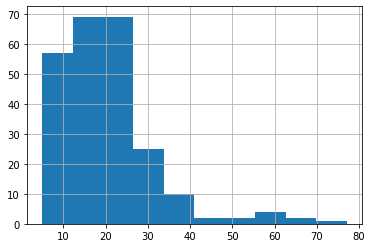

In [9]:
#histogram of ingredients count

df["ingredients_count"].hist()

In [10]:
df["ingredients_count"].describe()

count    241.000000
mean      20.369295
std       11.384956
min        5.000000
25%       13.000000
50%       19.000000
75%       25.000000
max       77.000000
Name: ingredients_count, dtype: float64

Below are WIP

In [60]:
#Append dairy free keywords to df

is_dairy = []
for ing_parent in ingredients:
    if ing_parent.title() in dairy[0].to_list():
        is_dairy.append(ing_parent)
    ing_par_list = re.split(r'[.,:()]',ing_parent)
    for ing_child in ing_par_list:
        if ing_child.strip().title() in dairy[0].to_list():
            is_dairy.append(ing_parent)
dairy_list = list(set(is_dairy))

In [61]:
dairy_list

['WEET CREAM ICE CREAM: CREAM',
 'BUTTER (MILK)',
 'CREAM (MILK)',
 'CARAMEL ICE CREAM: CREAM',
 'MILK FAT',
 'BUTTER',
 'CREAM CHEESE (CREAM, MILK, CHEESE CULTURE, SALT, GUAR GUM, CAROB BEAN GUM, XANTHAN GUM)',
 'SWEETENED CONDENSED MILK (CONDENSED MILK SUGAR)',
 'CONDENSED MILK',
 'HEAVY CREAM',
 'CONTAINS: MILK',
 'WHITE CHOCOLATE ICE CREAM: CREAM',
 'CREAM CHEESE (MILK, CREAM, CHEESE CULTURE, SALT, CAROB GUM, GUAR GUM, XANTHAN GUM)',
 'MILK',
 'ULCE DE LECHE ICE CREAM: CREAM',
 'BUTTER (CREAM)',
 'SWEETENED CONDENSED MILK',
 'ORGANIC BUTTER (CREAM, SALT)',
 'CHOCOLATE ICE CREAM: CREAM',
 'WHEY PROTEIN CONCENTRATE',
 'LACTOSE',
 'CARAMEL SWIRL: SWEETENED CONDENSED MILK (MILK, SUGAR)',
 'BUTTER (CREAM, SALT)',
 'SWEETENED CONDENSED SKIM MILK (SKIM MILK, SUGAR)',
 'CREAM CHEESE (PASTEURIZED MILK, CREAM, CHEESE CULTURES, SALT, CAROB BEAN GUM)',
 'SKIM MILK',
 'WHEY',
 'SWEETENED CONDENSED MILK (MILK,SUGAR)',
 'BUTTER OIL',
 'CREAM',
 'SODIUM CASEINATE',
 'NONFAT MILK',
 'VANILLA ICE CR

In [66]:
#pd.DataFrame(data = ingredients).sort_values(by = 0).to_csv("testdf.csv")

In [67]:
nondairy = [x for x in ingredients if x not in dairy_list]
pd.DataFrame(data = nondairy).to_csv("nondairy.csv")

In [21]:
##Food order

"""
Q. How are ingredients listed on a product label?
A. Food manufacturers are required to list all ingredients in the food on the label. 
On a product label, the ingredients are listed in order of predominance, 
with the ingredients used in the greatest amount first, followed in descending order by those in smaller amounts. 
The label must list the names of any FDA-certified color additives (e.g., FD&C Blue No. 1 or the abbreviated name, Blue 1). 
But some ingredients can be listed collectively as "flavors," "spices," "artificial flavoring,"
or in the case of color additives exempt from certification, "artificial colors", without naming each one. 
Declaration of an allergenic ingredient in a collective or single color, flavor, or spice 
could be accomplished by simply naming the allergenic ingredient in the ingredient list.

https://www.fda.gov/food/food-ingredients-packaging/overview-food-ingredients-additives-colors


"""



In [12]:
#Try to separate out sub keywords?

sub_ing_dict = {}
sub_ing_list = []
for i in range(len(ingredients)):
    sub_ing_i = ingredients[i]
    sub_ing_split = sub_ing_i.split(",")
    for ele in sub_ing_split:
        if ele in sub_ing_dict.keys():
            sub_ing_dict[ele] = sub_ing_dict[ele] + 1
        else:
            sub_ing_dict[ele] = 1
    sub_ing_list.append(sub_ing_split)
sub_ing_flat = [ing for sublist in sub_ing_list for ing in sublist]
sub_ingredients = list(set(sub_ing_flat))

In [13]:
#append ingredients_count column to dataframe

ingCount = []
top20_dict = {}
for i in range(len(df)):
    ing_split = re.split(r'[.,]\s*(?![^()]*\))', df["ingredients"][i])
    ingCount.append(len(ing_split))
    top20_dict[df["key"][i]] = ing_split[0:20]
df["ingredients_count"] = ingCount
df.sort_values(by = "ingredients_count", ascending = False)

,brand,key,name,subhead,description,rating,rating_count,ingredients,ingredients_count
204,breyers,32_breyers,SNICKERS® & M&M'S® 2in1,NaN,SNICKERS® or M&M'S®? When it comes to your fav...,3.9,52,"SKIM MILK, SUGAR, SNICKERS PIECES*, MILK CHOCO...",77
217,breyers,45_breyers,New York Style Cheesecake,NaN,"Can’t get enough of rich, creamy cheesecake? Y...",3.3,36,"NONFAT MILK, STRAWBERRY SWIRL, WATER, SUGAR, C...",69
240,breyers,68_breyers,Layered Dessert Brownie Cheesecake,NaN,Love brownie cheesecake? What about Breyers®? ...,2.8,25,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,...",67
203,breyers,31_breyers,SNICKERS®,NaN,Breyers® joins forces with America’s favorite ...,4.4,109,"SKIM MILK, SUGAR, CARAMEL SWIRL, CORN SYRUP, W...",62
201,breyers,29_breyers,REESE'S & REESE'S PIECES 2in1,NaN,REESE'S PIECES or REESE'S Peanut Butter Cups? ...,3.3,88,"MILK, CORN SYRUP, REESE'S PEANUT BUTTER CUP PI...",59
...,...,...,...,...,...,...,...,...,...
66,hd,9_hd,Chocolate Ice Cream,NaN,"Rich, creamy, and totally indulgent. Made from...",4.9,90,"CREAM, SKIM MILK, CANE SUGAR, COCOA PROCESSED ...",5
116,hd,59_hd,Vanilla Ice Cream,NaN,Vanilla is the essence of elegance and sophist...,3.0,228,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, VANIL...",5
172,breyers,0_breyers,Natural Vanilla,NaN,Our Original Vanilla Ice Cream. The way vanill...,4.1,467,"MILK, CREAM, SUGAR, VEGETABLE GUM (TARA), NATU...",5
78,hd,21_hd,Coffee Ice Cream,NaN,We roast the finest Brazilian coffee beans and...,4.6,173,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, COFFEE",5


In [16]:
pd.DataFrame.from_dict(top20_dict, orient = "index")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0_bj,CREAM,SKIM MILK,"LIQUID SUGAR (SUGAR, WATER)",WATER,BROWN SUGAR,SUGAR,MILK,WHEAT FLOUR,EGG YOLKS,CORN SYRUP,EGGS,"BUTTER (CREAM, SALT)",BUTTEROIL,PECTIN,SEA SALT,SOYBEAN OIL,VANILLA EXTRACT,GUAR GUM,SOY LECITHIN,"BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODI..."
1_bj,CREAM,SKIM MILK,"LIQUID SUGAR (SUGAR, WATER)",WATER,SUGAR,PEANUTS,WHEAT FLOUR,CANOLA OIL,EGG YOLKS,CORN STARCH,PEANUT OIL,COCOA POWDER,SALT,SOYBEAN OIL,INVERT CANE SUGAR,MILK FAT,EGGS,EGG WHITES,GUAR GUM,SOY LECITHIN
2_bj,CREAM,"LIQUID SUGAR (SUGAR, WATER)",SKIM MILK,WATER,SUGAR,COCOA (PROCESSED WITH ALKALI),POTATO,COCONUT OIL,CORN SYRUP SOLIDS,SOYBEAN OIL,EGG YOLKS,RICE STARCH,SUNFLOWER OIL,BARLEY MALT,COCOA POWDER,WHEAT FLOUR,MILK,SALT,SOY LECITHIN,YEAST EXTRACT
3_bj,CREAM,SKIM MILK,"LIQUID SUGAR (SUGAR, WATER)",WATER,CORN SYRUP,COCONUT OIL,SUGAR,DRIED CANE SYRUP,EGG YOLKS,WHEAT FLOUR,MILK,COCOA,NATURAL FLAVOR,GUAR GUM,SOY LECITHIN,BUTTER OIL,NATURAL FLAVORS,LOCUST BEAN GUM,SALT,CITRIC ACID
4_bj,CREAM,SKIM MILK,WATER,"LIQUID SUGAR (SUGAR, WATER)",SUGAR,CANOLA OIL,SOYBEAN OIL,EGG YOLKS,CORN SYRUP,WHEAT FLOUR,COCONUT OIL,CORN STARCH,COCOA (PROCESSED WITH ALKALI),CORN SYRUP SOLIDS,COCOA,GRAHAM FLOUR,SALT,EGG WHITES,BUTTEROIL,TAPIOCA STARCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64_breyers,MILK,CORN SYRUP,SUGAR,BROWN SUGAR,SOYBEAN OIL,WATER,BUTTER,CREAM,SALT,CORN SYRUP,SPICE,SALT,SOYBEAN LECITHIN,VANILLA EXTRACT,DRIED CANE SYRUP,UNBLEACHED UNENRICHED WHEAT FLOUR,COCONUT OIL,WATER,BUTTER,CREAM
65_breyers,MILK,WATER,CARAMEL SWIRL,SUGAR,WATER,CORN SYRUP,HIGH FRUCTOSE CORN SYRUP,NONFAT MILK SOLIDS,BUTTER,CREAM,SALT,SALT,MOLASSES,PECTIN,SOY LECITHIN,NATURAL FLAVOR,POTASSIUM SORBATE (PRESERVATIVE),SODIUM CITRATE,LACTIC ACID,MALTITOL SYRUP
66_breyers,MILK,CORN SYRUP,SUGAR,WHEAT FLOUR,BUTTER,CREAM (MILK),SALT,PALM OIL,CORN SYRUP,NONFAT MILK,WATER,RICE FLOUR,NATURAL FLAVORS,SALT,WHEAT FLOUR,SUGAR,PALM OIL,MOLASSES,SPICES,SALT
67_breyers,MILK,CORN SYRUP,ENRICHED WHEAT FLOUR,WHEAT FLOUR,NIACIN,REDUCED IRON,THIAMIN MONONITRATE,RIBOFLAVIN,FOLIC ACID,SUGAR,BUTTER,CREAM,SALT,CANOLA OIL,SKIM MILK POWDER,SALT,SODIUM BICARBONATE,PEACHES,FRUCTOSE,COCONUT OIL
